In [7]:
img = cv2.imread('Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/virat_kohli/5a3384f779.jpg')


In [8]:
img.shape

(168, 300, 3)

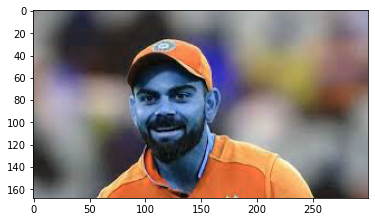

In [9]:
plt.imshow(img)

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(168, 300)

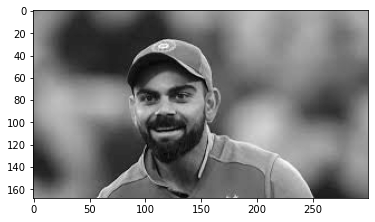

In [11]:
plt.imshow(gray, cmap = 'gray')

In [12]:
face_cascade = cv2.CascadeClassifier('haar/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haar/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[86, 53, 66, 66]], dtype=int32)

In [13]:
(x,y,w,h)= faces[0]
x,y,w,h

(86, 53, 66, 66)

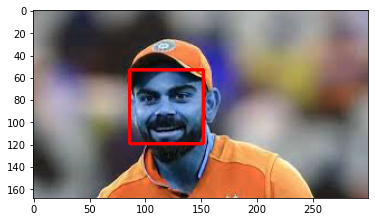

In [14]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

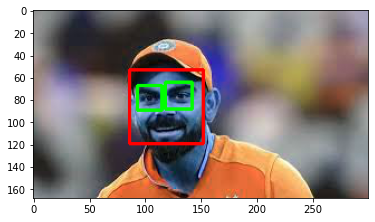

In [15]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

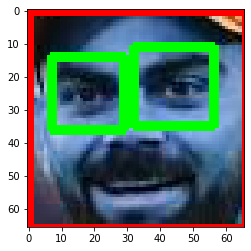

In [16]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [17]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

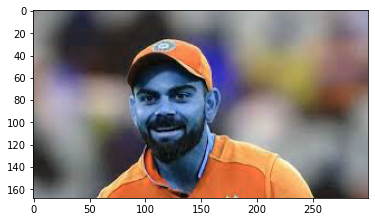

In [19]:
original_image =  cv2.imread('Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/virat_kohli/5a3384f779.jpg')
plt.imshow(original_image)

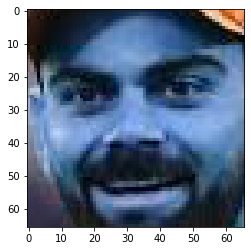

In [21]:
cropped_image = get_cropped_image_if_2_eyes('Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/virat_kohli/5a3384f779.jpg')
plt.imshow(cropped_image)

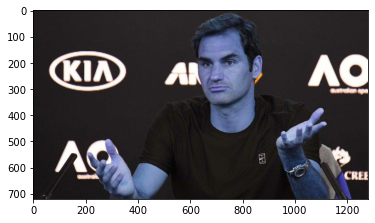

In [35]:
original_image =  cv2.imread('Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/roger_federer/643791-641790-roger-federer-aus-open-2018-afp.jpg')
plt.imshow(original_image)

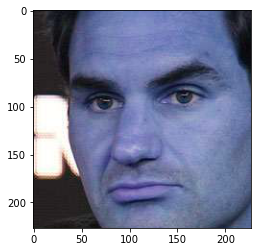

In [37]:
cropped_image = get_cropped_image_if_2_eyes('Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/roger_federer/643791-641790-roger-federer-aus-open-2018-afp.jpg')
plt.imshow(cropped_image)

In [24]:
path_to_data = "Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/"
path_to_cr_data = "Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/cropped/"

In [25]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [26]:
img_dirs

['Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/.ipynb_checkpoints',
 'Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/lionel_messi',
 'Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/maria_sharapova',
 'Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/roger_federer',
 'Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/serena_williams',
 'Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/virat_kohli']

In [27]:
import shutil
if os.path.exists(path_to_cr_data):    #if the folder exists then remove it
     shutil.rmtree(path_to_cr_data)     #this command removes the folder
os.mkdir(path_to_cr_data)                #this created the folder by mkdir

In [28]:
cropped_image_dirs = []
celebrity_file_names_dict = {} #this is  a dictionary to store each player image path

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] #it is used to get names of celebrtiy from path 
    print(celebrity_name) #a fun work to check the naems
    
    celebrity_file_names_dict[celebrity_name] = [] #this will act as a key 
    
    for entry in os.scandir(img_dir): #this goes in every directory
        roi_color = get_cropped_image_if_2_eyes(entry.path) #check the fuction we have created
        if roi_color is not None: #this means if the cropped image has face and 2 eyes
            cropped_folder = path_to_cr_data + celebrity_name #this creates a folder of each celeb
            if not os.path.exists(cropped_folder): #check whether we have a foleder
                os.makedirs(cropped_folder) #if not then it makes it
                cropped_image_dirs.append(cropped_folder) #this makes an array with folder naems
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png" #give the file name
            cropped_file_path = cropped_folder + "/" + cropped_file_name #give the file path name
            
            cv2.imwrite(cropped_file_path, roi_color) #this saves the files 
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path) #fil data in dictionary of paths
            count += 1    

.ipynb_checkpoints
lionel_messi
Generating cropped images in folder:  Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/cropped/roger_federer
serena_williams
Generating cropped images in folder:  Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/cropped/virat_kohli


In [29]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/cropped/lionel_messi\\lionel_messi1.png',
  'Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/cropped/lionel_messi\\lionel_messi10.png',
  'Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/cropped/lionel_messi\\lionel_messi11.png',
  'Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/cropped/lionel_messi\\lionel_messi12.png',
  'Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/cropped/lionel_messi\\lionel_messi13.png',
  'Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/cropped/lionel_messi\\lionel_messi14.png',
  'Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/cropped/lionel_messi\\lionel_messi15.png',
  'Downloads/py-master (2)/CelebrityFaceRecognition/model/dataset/folder/cropped/lionel_messi\\lionel_messi16.png',
  'Downloads/py-master (2)/CelebrityFaceRecognition/model

In [30]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

this is because ML deals with numbers

In [43]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    if img is None:
        return img
    imArray = (img)
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    
    return imArray_H

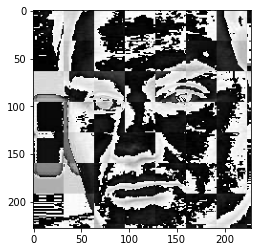

In [44]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap= 'gray')

In [68]:
x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32)) #we are resizing all the images to a porper size using opencv(scalled raw image)
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
# in above combined img we first stacked the two images wavelet and original; the size in orginal colored img is 32*32*3 is because of rgb dimensinos        
        x.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [69]:
len(x)

189

In [70]:
len(x[0])

4096

In [71]:
32*32*3 + 32*32

4096

In [72]:
type(x)

list

In [78]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(189, 4096)

In [79]:
x[0]

array([ 96., 129., 141., ..., 237., 234., 233.])

In [80]:
type(x)

numpy.ndarray

In [81]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.75

In [84]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.64      0.78      0.70         9
           2       0.75      0.60      0.67         5
           3       0.80      0.67      0.73        12
           4       0.71      0.83      0.77        12

    accuracy                           0.75        48
   macro avg       0.76      0.74      0.74        48
weighted avg       0.76      0.75      0.75        48



In [85]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [87]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.772660,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.616749,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.779557,{'logisticregression__C': 1}


In [88]:
best_estimators['svm'].score(x_test,y_test)

0.75

In [89]:
best_estimators['random_forest'].score(x_test,y_test)

0.625

In [90]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.7291666666666666

In [91]:
best_clf = best_estimators['svm']

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 8,  0,  0,  0,  2],
       [ 1,  7,  0,  1,  0],
       [ 0,  1,  3,  1,  0],
       [ 0,  1,  1,  8,  2],
       [ 0,  2,  0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

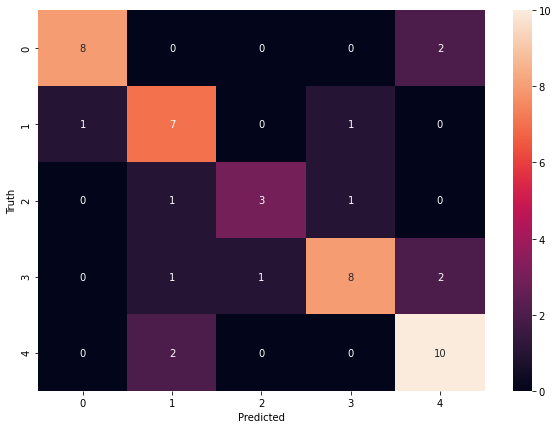

In [96]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [97]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [98]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [99]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))